## Importing Relevant Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

## Reading in Survey Results

In [2]:
student_responses = pd.read_excel("STEM Ethics Student Survey (Responses).xlsx")

In [27]:
len(student_responses)

83

## Data Visualization

In [28]:
student_responses = student_responses.set_axis(["Time", "Email", 
                                                "College", "Major/Minor", 
                                                "Awareness", "Ethics Class", 
                                                "Importance Rating", "Elaborated Rating", 
                                                "Socioethical Implications", "More Thoughts", 
                                                "Further Discussion Interest"], axis=1, inplace=False)

### Overall Student Awareness of Ethics Curriculum in their College

In [29]:
student_awareness = student_responses["Awareness"].replace(to_replace = np.nan, value = "No")
pct_unawareness = sum(student_awareness == "No")/len(student_responses)

In [31]:
print(str(round(pct_unawareness*100, 2)) + '% of students in our sample are unaware of any ethics curriculum in their college.')

59.04% of students in our sample are unaware of any ethics curriculum in their college.


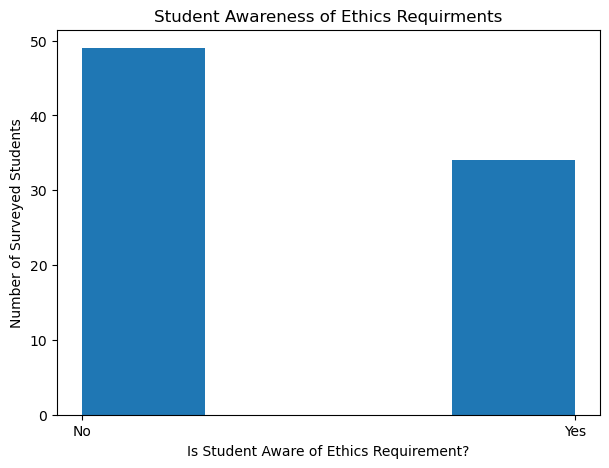

In [32]:
fig = plt.figure(figsize = (7,5))
ax = fig.gca()
plt.hist(student_awareness, bins = 4)
plt.xlabel("Is Student Aware of Ethics Requirement?")
plt.ylabel("Number of Surveyed Students")
plt.title("Student Awareness of Ethics Requirments")
plt.show()

A majority of STEM majors surveyed are unaware of Ethics requirements in their major.

### Discrepancy in awareness across majors and colleges

In [33]:
awareness_by_college = student_responses.groupby("College")[["Awareness"]].apply(sum)


awareness_by_college["Not Aware Count"] = awareness_by_college["Awareness"].apply(lambda x: sum([1 for i in x if i=="N"]))
awareness_by_college["Aware Count"] = awareness_by_college["Awareness"].apply(lambda x: sum([1 for i in x if i=="Y"]))
awareness_by_college = awareness_by_college.drop("Awareness", axis=1)

awareness_by_college.loc["Letters & Science"]["Aware Count"] += awareness_by_college.loc["Letters & Science, Haas School of Business"]["Aware Count"]
awareness_by_college.loc["Letters & Science"]["Aware Count"] += awareness_by_college.loc["Letters & Science, Natural Resources"]["Aware Count"]

awareness_by_college = awareness_by_college.drop(["Letters & Science, Haas School of Business", "Letters & Science, Natural Resources"], axis=0)


awareness_by_college

,Not Aware Count,Aware Count
College,,
Chemistry,3,0
Engineering,1,8
Haas School of Business,1,0
Letters & Science,40,24
Natural Resources,3,2


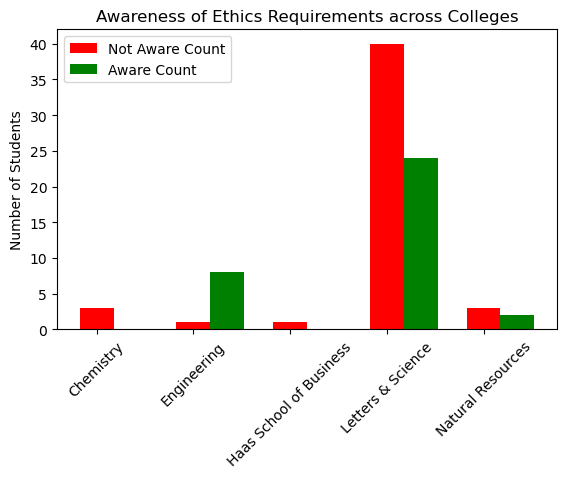

In [34]:
colleges = list(awareness_by_college.index)

X = np.arange(5)
fig = plt.figure(figsize = (5,3))
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.0, awareness_by_college["Not Aware Count"], color = 'r', width = 0.35)
ax.bar(X + .35, awareness_by_college["Aware Count"], color = 'g', width = 0.35)
plt.legend(["Not Aware Count", "Aware Count"])
plt.xticks(np.arange(5), colleges, rotation = 45)
plt.title("Awareness of Ethics Requirements across Colleges")
plt.ylabel("Number of Students")
plt.show()


### Average rating of importance of STEM Ethics

In [35]:
avg_rating_importance = np.mean(student_responses["Importance Rating"])

In [36]:
print("The average rating of the importance of STEM Ethics curriculum is " + str(round(avg_rating_importance, 2)) + " on a scale from 1 to 10, with 10 being the most important.")

The average rating of the importance of STEM Ethics curriculum is 8.65 on a scale from 1 to 10, with 10 being the most important.


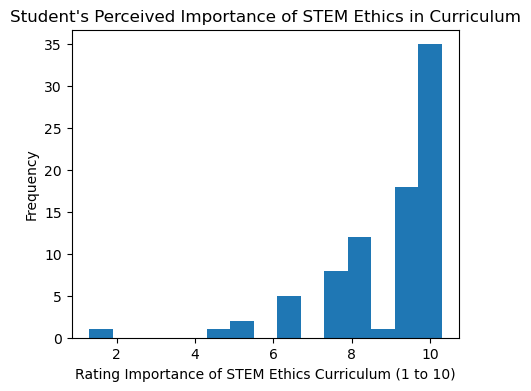

In [37]:
fig = plt.figure(figsize = (5,4))
ax = fig.gca()
plt.xlabel("Rating Importance of STEM Ethics Curriculum (1 to 10)")
plt.ylabel("Frequency")
plt.title("Student's Perceived Importance of STEM Ethics in Curriculum")
plt.hist(student_responses["Importance Rating"], bins = 15, align = "right")
plt.show()

In [38]:
emails = student_responses["Further Discussion Interest"]
num_interest_in_further_disc = len(student_responses) - sum(emails.isna())

In [39]:
print(str(num_interest_in_further_disc) + " UC Berkeley STEM students find these issues important enough to have committed to having more discussions with us regarding their thoughts on STEM Ethics.")

20 UC Berkeley STEM students find these issues important enough to have committed to having more discussions with us regarding their thoughts on STEM Ethics.


### Word cloud of elaborations on ratings

In [43]:
elaborated_ratings=student_responses["Elaborated Rating"].str.replace('/', ' ', regex = False).str.replace('[^\w\s]','', regex = True)
elaborated_ratings.head()

0    for many stem students in the biological scien...
1    Many STEM majors minors go into fields where d...
2    It is important for STEM majors minors to stud...
3    Although I think it is important for all areas...
4    Ethics are so integral to understanding the so...
Name: Elaborated Rating, dtype: object

In [44]:
words = []
for rating in elaborated_ratings:
    rating = str(rating)
    if rating != "nan":
        words += [str(rating).lower().split(" ")]

all_words = []
for lst in words:
    all_words += lst
    
nonessential_words = ["the", "to", "of", "stem", "is", "it", "that", "a", "in", "i", "be", "we", "are",
                     "as", "or", "not", "with", "an", "all", "and", "for", "", "so", "will", "they", "can",
                     "their", "on", "if", "but", "these", "into", "its", "any", "when", "could", "them", "dont",
                     "at", "majorsminors", "am", "no", "your", "what", "by", "this", "about", "which", "from", "how",
                     "you", "me", "who", "there", "188", "same", "61", "was", "bs", "ds", "188s", "has", "yet", "while",
                     "those", "have", "things", "also", "do", "would", "lot", "where", "some", "didnt", "thing", "too",
                      "one", "my", "get", "up", "do\n", "had", "wholl", "were", "put", "whats", "pretty",
                     "because", "should", "more", "need", "very", "our", "think"]
essential_words = pd.Series([word for word in all_words if not word in nonessential_words])



word_counts = essential_words.value_counts().to_dict()

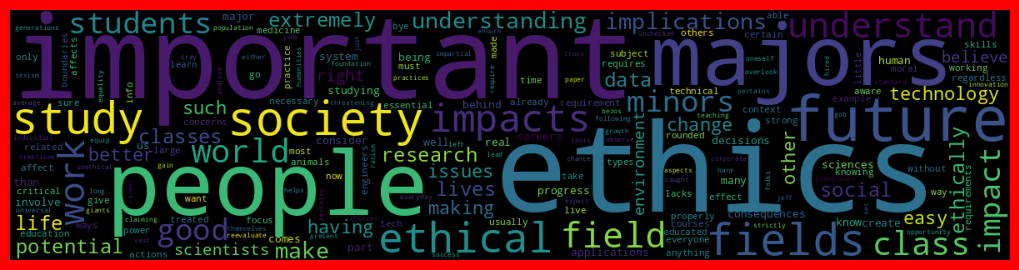

In [45]:
wordcloud = WordCloud(width=1200, height=300).generate_from_frequencies(word_counts)
plt.figure(figsize=(10,5), facecolor='r')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

### Wordcloud of the socioethical implications of STEM Ethics curriculum

In [46]:
socioethical=student_responses["Socioethical Implications"].str.replace('/', ' ', regex = False).str.replace('[^\w\s]','', regex = True)
socioethical.head()

0    being a good healthcare provider requires a st...
1    I am premed so many of the decisions I make in...
2    The ethical and social implications of my futu...
3    As a data scientist it is very important to un...
4    I am interested in tech but more recently Ive ...
Name: Socioethical Implications, dtype: object

In [47]:
words2 = []
for se_desc in socioethical:
    se_desc = str(se_desc)
    if se_desc != "nan":
        words2 += [str(se_desc).lower().split(" ")]

all_words2 = []
for lst in words2:
    all_words2 += lst

    

essential_words2 = pd.Series([word for word in all_words if not word in nonessential_words])

word_counts2 = essential_words2.value_counts().to_dict()

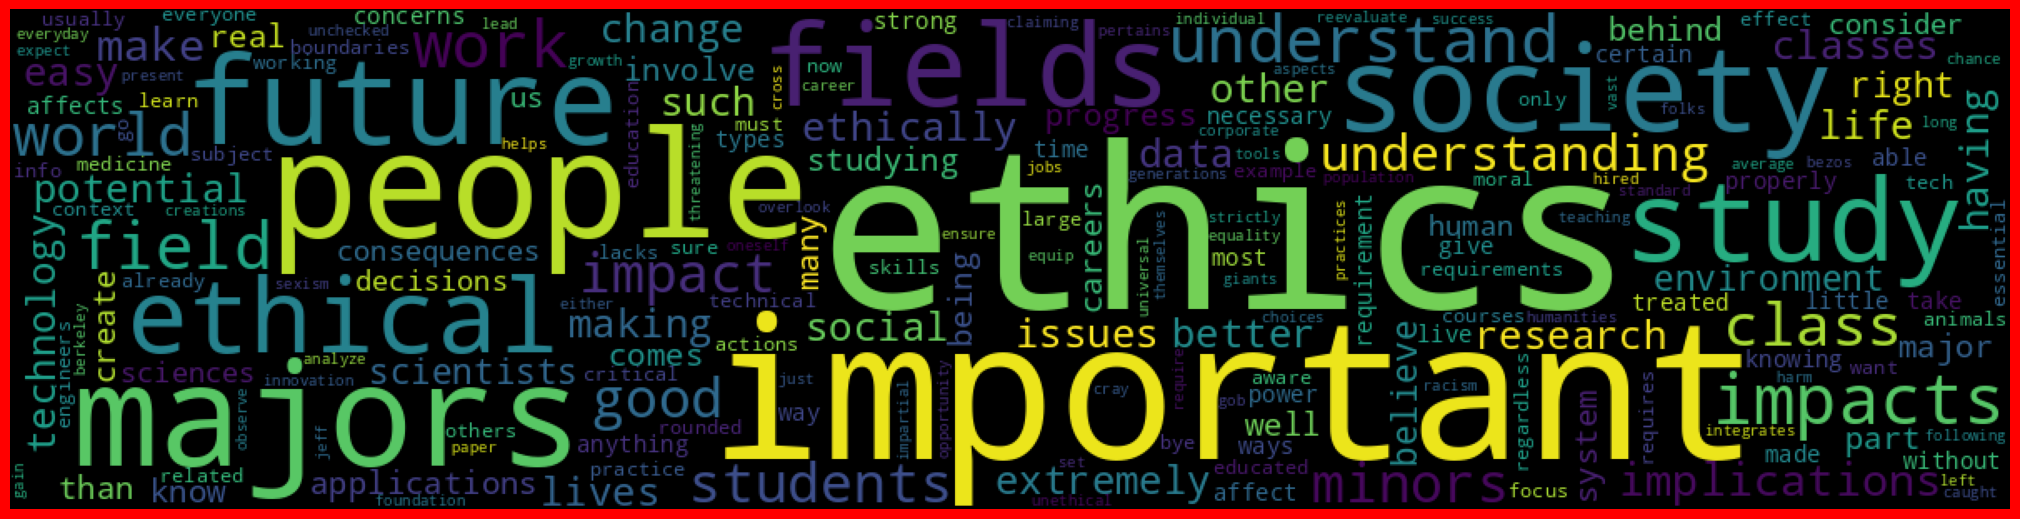

In [48]:
wordcloud2 = WordCloud(width=1200, height=300).generate_from_frequencies(word_counts2)
# Open a plot of the generated image.
plt.figure( figsize=(20,10), facecolor='r')
plt.imshow(wordcloud2)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()